In [3]:
#Loading the twitter sentiment dataset, set the index, calculat engagement ratio and 
#filter out stocks with no significant twitter activity.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
plt.style.use('ggplot')

sentiment_df = pd.read_csv('sentiment_data.csv')
sentiment_df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [4]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [9]:
sentiment_df = sentiment_df.set_index(['date','symbol'])
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [10]:
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           ABT                64089.0               NaN          0.230769  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
...                               ...               ...               ...  
2023-01-04 TMO                30857.0          0.610020          0.062500  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[27235 rows x 6 columns]

In [11]:
sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

In [12]:
#2. Aggregating Monthly and calculate average sentiment for the month

In [14]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='ME'), 'symbol'])
                    [['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggragated_df


engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

In [15]:
#3. Selecting Top 5 Stocks based on their cross-sectional ranking for each month

In [16]:
filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

In [17]:
#Extracting the stocks to form portfolios with at the start of each new month
#Creating a dictionary containing start of month and corresponded selected stocks

In [18]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

In [19]:
#Download stock prices for only selected/shortlisted stocks

In [20]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list,
                        start='2021-01-01',
                        end='2023-03-01')

/var/folders/0d/n0jf1vdd3mdc6nt13hq9cb480000gn/T/ipykernel_75692/588855098.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices_df = yf.download(tickers=stocks_list,
[*********************100%***********************]  85 of 85 completed

2 Failed downloads:
['ATVI', 'MRO']: YFTzMissingError('possibly delisted; no timezone found')


In [41]:
#Calculating Portfolio Returns with monthly rebalancing
prices_df

Price      Adj Close           Close                                 \
Ticker          ATVI MRO           A    AAL         AAP        AAPL   
Date                                                                  
2021-01-04       NaN NaN  114.864677  15.13  140.622070  125.974449   
2021-01-05       NaN NaN  115.803810  15.43  140.470154  127.531982   
2021-01-06       NaN NaN  118.979424  15.52  148.585403  123.239059   
2021-01-07       NaN NaN  122.145393  15.38  149.854523  127.444382   
2021-01-08       NaN NaN  123.016747  15.13  151.990540  128.544388   
...              ...  ..         ...    ...         ...         ...   
2023-02-22       NaN NaN  139.212860  15.56  135.060913  146.920898   
2023-02-23       NaN NaN  140.310211  15.87  133.546860  147.404343   
2023-02-24       NaN NaN  138.350571  15.56  130.575180  144.750259   
2023-02-27       NaN NaN  139.310791  15.63  132.249130  145.944107   
2023-02-28       NaN NaN  139.105072  15.98  136.321075  145.440933   

Price                                                     ...   Volume  \
Ticker            ABBV         ABT        AEP        AES  ...      RCL   
Date                                                      ...            
2021-01-04   86.739716   99.687309  67.898140  19.330854  ...  5732800   
2021-01-05   87.636658  100.920723  67.806541  19.979654  ...  4029500   
2021-01-06   86.879608  100.710587  68.347786  20.778177  ...  3612500   
2021-01-07   87.809441  101.688179  66.524178  20.570229  ...  3993700   
2021-01-08   88.270256  101.971413  65.932968  21.144161  ...  3104200   
...                ...         ...        ...        ...  ...      ...   
2023-02-22  136.275543   97.309258  81.777481  22.388321  ...  2044600   
2023-02-23  137.541809   97.176598  81.678429  22.388321  ...  2066600   
2023-02-24  138.120636   95.196114  81.426308  22.326597  ...  2875100   
2023-02-27  139.540634   94.542267  81.102158  21.938612  ...  2459700   
2023-02-28  139.196945   96.390091  79.211243  21.762262  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 427 columns]

In [45]:
returns_df = np.log(prices_df['Close']).diff().drop(index='2021-01-04')
returns_df

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,AEP,AES,ALB,AMD,...,RCL,REGN,SLB,STZ,T,TMO,TSLA,TSN,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.008143,0.019634,-0.001081,0.012288,0.010288,0.012297,-0.001350,0.033012,0.065304,0.005079,...,0.025548,0.001221,0.052363,0.000692,-0.006133,0.012427,0.007291,-0.000788,-0.015037,0.047067
2021-01-06,0.027053,0.005816,0.056165,-0.034241,-0.008676,-0.002084,0.007950,0.039189,0.072037,-0.026654,...,-0.004836,-0.028024,0.053862,0.031005,0.019293,0.015557,0.027995,0.029658,-0.008850,0.025197
2021-01-07,0.026262,-0.009062,0.008505,0.033554,0.010646,0.009660,-0.027044,-0.010058,0.049578,0.052090,...,0.024355,0.023359,0.019071,0.022759,0.002679,0.030686,0.076448,-0.011541,0.005581,0.007815
2021-01-08,0.007108,-0.016388,0.014153,0.008594,0.005234,0.002781,-0.008927,0.027519,0.000544,-0.006114,...,-0.013746,0.035782,-0.001609,0.005838,-0.006921,0.023643,0.075481,-0.009017,0.007641,0.011060
2021-01-11,0.008542,-0.008629,0.005629,-0.023523,0.016182,-0.006923,-0.005065,0.001572,-0.037692,0.027839,...,-0.011717,0.008366,0.006021,-0.014571,-0.005182,0.002047,-0.081442,0.011491,-0.011953,0.029905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,-0.009387,-0.008320,-0.003961,0.002892,-0.008788,-0.009305,-0.000330,-0.007064,0.018387,-0.002086,...,-0.003490,0.002088,-0.018713,-0.004447,0.008811,-0.004312,0.017528,0.016659,-0.002723,-0.013038
2023-02-23,0.007852,0.019727,-0.011273,0.003285,0.009249,-0.001364,-0.001212,0.000000,0.029584,0.040169,...,0.002793,0.015361,0.017214,0.015546,-0.001549,0.004639,0.006006,0.009992,0.005032,0.009162
2023-02-24,-0.014065,-0.019727,-0.022503,-0.018170,0.004200,-0.020591,-0.003092,-0.002761,-0.017204,-0.021035,...,-0.021709,-0.003521,0.011190,-0.006716,-0.005701,-0.014922,-0.026020,-0.018287,-0.007171,0.000090


In [46]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


In [47]:
#Downloading NASDAQ/QQQ prices and calculate returns to compare to our strategy

In [50]:
qqq_df = yf.download(tickers='QQQ',
                     start='2021-01-01',
                     end='2023-03-01')




/var/folders/0d/n0jf1vdd3mdc6nt13hq9cb480000gn/T/ipykernel_75692/1422647271.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq_df = yf.download(tickers='QQQ',
[*********************100%***********************]  1 of 1 completed


In [57]:
qqq_ret = (np.log(qqq_df['Close'].squeeze())  # DataFrame(542,1) → Series(542)
           .diff()
           .dropna()
           .to_frame('nasdaq_return'))

print(qqq_ret.head())
print(f"Shape: {qqq_ret.shape}")


            nasdaq_return
Date                     
2021-01-05       0.008210
2021-01-06      -0.013949
2021-01-07       0.023904
2021-01-08       0.012776
2021-01-11      -0.014555
Shape: (541, 1)


In [58]:
portfolio_df = portfolio_df.merge(qqq_ret, left_index=True, right_index=True)
portfolio_df

,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


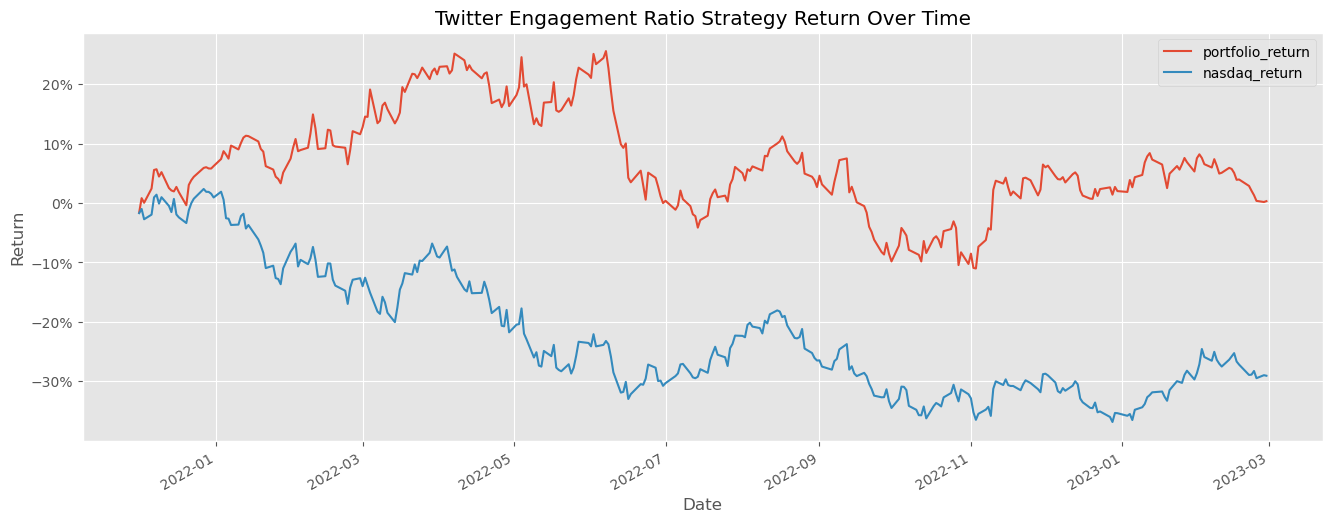

In [61]:
import matplotlib.ticker as mtick

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()